<a href="https://colab.research.google.com/github/Jenny000327/Data_analysis/blob/main/7_%EC%87%BC%ED%95%91_%EC%9D%B8%EC%82%AC%EC%9D%B4%ED%8A%B8_%ED%82%A4%EC%9B%8C%EB%93%9C_%EA%B8%B0%EA%B8%B0%EB%B3%84_%ED%8A%B8%EB%A0%8C%EB%93%9C_%EC%A1%B0%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 쇼핑 인사이트 키워드 기기별 트렌드 조회

In [ ]:
import requests
import json

# 클라이언트 아이디와 클라이언트 시크릿 설정
client_id = "0T1JOYIqKWNOC8o1_6pM"
client_secret = "rkfbCrzxzA"

# API 요청 URL 설정
url = "https://openapi.naver.com/v1/datalab/shopping/category/keyword/device"

# API 요청 헤더 설정
headers = {
    "X-Naver-Client-Id": client_id,
    "X-Naver-Client-Secret": client_secret,
    "Content-Type": "application/json"
}

# API 요청 파라미터 설정

params = {
    "startDate": "2022-01-01",
    "endDate": "2022-12-01",
    "timeUnit": "month",
    "category": "50000000",
    "keyword": "정장",
    "device": "",
    "gender": "",
    "ages": []
}

# API 호출
response = requests.post(url, headers=headers, data=json.dumps(params))

# API 호출 결과 확인
if response.status_code == 200:
    print(response.json())
else:
    print("Error {}: {}".format(response.status_code, response.json()["errMsg"]))


{'startDate': '2022-01-01', 'endDate': '2022-12-31', 'timeUnit': 'month', 'results': [{'title': '정장', 'keyword': ['정장'], 'data': [{'period': '2022-01-01', 'ratio': 53.82141, 'group': 'mo'}, {'period': '2022-01-01', 'ratio': 14.0366, 'group': 'pc'}, {'period': '2022-02-01', 'ratio': 54.86025, 'group': 'mo'}, {'period': '2022-02-01', 'ratio': 16.76972, 'group': 'pc'}, {'period': '2022-03-01', 'ratio': 70.64061, 'group': 'mo'}, {'period': '2022-03-01', 'ratio': 19.46574, 'group': 'pc'}, {'period': '2022-04-01', 'ratio': 68.94014, 'group': 'mo'}, {'period': '2022-04-01', 'ratio': 22.29779, 'group': 'pc'}, {'period': '2022-05-01', 'ratio': 100, 'group': 'mo'}, {'period': '2022-05-01', 'ratio': 33.19935, 'group': 'pc'}, {'period': '2022-06-01', 'ratio': 39.40761, 'group': 'mo'}, {'period': '2022-06-01', 'ratio': 12.3114, 'group': 'pc'}, {'period': '2022-07-01', 'ratio': 32.21617, 'group': 'mo'}, {'period': '2022-07-01', 'ratio': 9.94311, 'group': 'pc'}, {'period': '2022-08-01', 'ratio': 38.7

# 판다스

In [ ]:
import requests
import json
import pandas as pd

# 클라이언트 아이디와 클라이언트 시크릿 설정
client_id = "0T1JOYIqKWNOC8o1_6pM"
client_secret = "rkfbCrzxzA"

# API 요청 URL 설정
url = "https://openapi.naver.com/v1/datalab/shopping/category/keyword/device"

# API 요청 헤더 설정
headers = {
    "X-Naver-Client-Id": client_id,
    "X-Naver-Client-Secret": client_secret,
    "Content-Type": "application/json"
}

# API 요청 파라미터 설정
params = {
    "startDate": "2022-01-01",
    "endDate": "2022-12-01",
    "timeUnit": "month",
    "category": "50000000",
    "keyword": "정장",
    "device": "",
    "gender": "",
    "ages": []
}

# API 호출
response = requests.post(url, headers=headers, data=json.dumps(params))

# API 호출 결과 확인
if response.status_code == 200:
    # 응답 JSON 데이터를 pandas 데이터프레임으로 변환
    data = response.json()["results"][0]["data"]
    df = pd.DataFrame(data)
    df["period"] = pd.to_datetime(df["period"])
    df = df.sort_values(by="period")
    print(df)
else:
    print("Error {}: {}".format(response.status_code, response.json()["errMsg"]))


       period      ratio group
0  2022-01-01   53.82141    mo
1  2022-01-01   14.03660    pc
2  2022-02-01   54.86025    mo
3  2022-02-01   16.76972    pc
4  2022-03-01   70.64061    mo
5  2022-03-01   19.46574    pc
6  2022-04-01   68.94014    mo
7  2022-04-01   22.29779    pc
8  2022-05-01  100.00000    mo
9  2022-05-01   33.19935    pc
11 2022-06-01   12.31140    pc
10 2022-06-01   39.40761    mo
12 2022-07-01   32.21617    mo
13 2022-07-01    9.94311    pc
14 2022-08-01   38.77689    mo
15 2022-08-01   13.30695    pc
16 2022-09-01   67.46846    mo
17 2022-09-01   17.10981    pc
18 2022-10-01   92.69107    mo
19 2022-10-01   41.93668    pc
20 2022-11-01   71.57432    mo
21 2022-11-01   21.58050    pc
22 2022-12-01   60.65421    mo
23 2022-12-01   12.92357    pc


#시각화


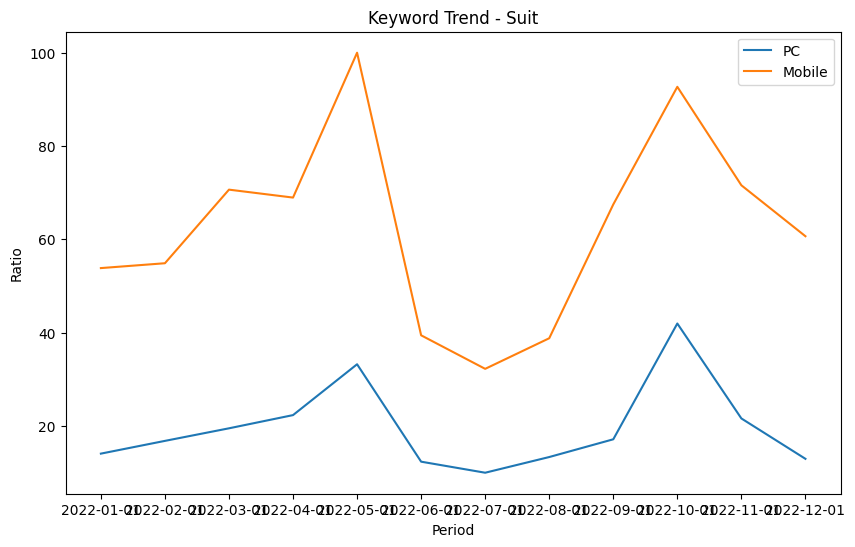

In [ ]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# 클라이언트 아이디와 클라이언트 시크릿 설정
client_id = "0T1JOYIqKWNOC8o1_6pM"
client_secret = "rkfbCrzxzA"

# API 요청 URL 설정
url = "https://openapi.naver.com/v1/datalab/shopping/category/keyword/device"

# API 요청 헤더 설정
headers = {
    "X-Naver-Client-Id": client_id,
    "X-Naver-Client-Secret": client_secret,
    "Content-Type": "application/json"
}

# API 요청 파라미터 설정
params = {
    "startDate": "2022-01-01",
    "endDate": "2022-12-01",
    "timeUnit": "month",
    "category": "50000000",
    "keyword": "정장",
    "device": "",
    "gender": "",
    "ages": []
}

# API 호출
response = requests.post(url, headers=headers, data=json.dumps(params))

# API 호출 결과 확인
if response.status_code == 200:
    data = response.json()
else:
    print("Error {}: {}".format(response.status_code, response.json()["errMsg"]))
    exit()

# 데이터 프레임 변환
result = []
for item in data["results"]:
    for data_item in item["data"]:
        row = {
            "title": item["title"],
            "keyword": item["keyword"][0],
            "period": data_item["period"],
            "group": data_item["group"],
            "ratio": data_item["ratio"]
        }
        result.append(row)
df = pd.DataFrame(result)

# 시각화
fig, ax = plt.subplots(figsize=(10, 6))
df_pc = df[df["group"] == "pc"]
df_mo = df[df["group"] == "mo"]
ax.plot(df_pc["period"], df_pc["ratio"], label="PC")
ax.plot(df_mo["period"], df_mo["ratio"], label="Mobile")
ax.legend()
ax.set_title("Keyword Trend - Suit")
ax.set_xlabel("Period")
ax.set_ylabel("Ratio")
plt.show()
